# Python_Analysis
## 1  Preparing for python
We use python for data analysis in this assessment. First, we output the python version and import the required modules.

The main module is "sklearn", which is a great module to do machine learning. And we  also use some basic and drawing modules.

For the list of modules installed in python, see [github](https://github.com/xiaozhang-github/DST_Assessment_1/blob/main/requirements.txt).

In [7]:
print(platform.python_version())

3.8.3


In [2]:
import platform
import numpy as np
import pandas as pd
import csv
import copy
import matplotlib.pyplot as plt
import pyecharts.options as opts
from pyecharts.charts import Line
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

## 2  Reading and preprocessing the data
### 2.1  Reading the data
The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic. This was processed into about five million connection records. Similarly, the two weeks of test data yielded around two million connection records.

"[kddcup.data_10_percent_corrected.csv](https://1drv.ms/f/s!AnIt27JVIncZbKhlUtJHWbXIwcc)" is 10% of these data, which is our analysis object this time.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. In the above dataset, there are a total of 22 specific attacks, which can be divided into four main categories:

* DOS: denial-of-service, e.g. syn flood;

* R2L: unauthorized access from a remote machine, e.g. guessing password;

* U2R: unauthorized access to local superuser (root) privileges, e.g., various "buffer overflow" attacks;

* probing: surveillance and other probing, e.g., port scanning.

First, we read this dataset, add column names, and convert each specific attack type into the four main attack category it belongs to. Then we output it for observation.

In [5]:
colnames = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
            'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
            'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
            'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','label']

#Divide various types of attacks into four main categories
attacktype = {'label':{'normal.':'normal', 
                       'back.':'DOS', 'land.':'DOS', 'neptune.':'DOS', 'pod.':'DOS', 'smurf.':'DOS','teardrop.':'DOS',
                       'ftp_write.':'R2L', 'guess_passwd.':'R2L', 'imap.':'R2L', 'multihop.':'R2L', 
                       'phf.':'R2L', 'spy.':'R2L', 'warezclient.':'R2L', 'warezmaster.':'R2L', 
                       'buffer_overflow.':'U2R', 'loadmodule.':'U2R', 'perl.':'U2R', 'rootkit.':'U2R',
                       'ipsweep.':'probing', 'nmap.':'probing', 'portsweep.':'probing', 'satan.':'probing'}}

data = pd.read_csv('kddcup.data_10_percent_corrected.csv',header=None,names = colnames)
data.replace(attacktype,inplace=True)
data.to_csv('kddcup99.csv',index=False)
data.head()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Observing the above dataframe, we can find that there are a total of 494021 connections, each of which has 41 features and 1 label (normal or one of the four attack types).

Then we count these connections' labels.

In [10]:
data['label'].value_counts()

DOS        391458
normal      97278
probing      4107
R2L          1126
U2R            52
Name: label, dtype: int64

The number of DOS is the largest, followed by normal traffic, and the number of U2R is very small, which may affect the prediction of U2R attacks in the future.

### 2.2  Preprocessing the data
In order to bring the data into the models, we need to preprocess the data. From the dataframe above, we can see that the three features of "protocol_type", "service", "flag" and labels are character variables, we need to convert them into numerical variables.

First, we find the types of these character variables.

In [15]:
df_group = data.groupby(by = 'protocol_type')
list1 = list(df_group.groups.keys())
list1

['icmp', 'tcp', 'udp']

In [16]:
df_group = data.groupby(by = 'service')
list2 = list(df_group.groups.keys())
list2

['IRC',
 'X11',
 'Z39_50',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'hostnames',
 'http',
 'http_443',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois']

In [17]:
df_group = data.groupby(by = 'flag')
list3 = list(df_group.groups.keys())
list3

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

Then we turn them into numeric variables according to the specified mapping and output it.

In [8]:
cleanup = {'protocol_type':{'tcp':1, 'icmp':2, 'udp':3},
           'service':{'vmnet': 1, 'smtp': 2, 'ntp_u':3, 'shell':4, 'kshell':5, 'aol':6, 'imap4':7, 'urh_i':8, 'netbios_ssn':9,
                      'tftp_u':10, 'mtp':11, 'uucp':12, 'nnsp':13, 'echo':14, 'tim_i':15, 'ssh':16, 'iso_tsap':17, 'time':18,
                      'netbios_ns':19,'systat':20, 'hostnames':21, 'login':22, 'efs':23, 'supdup':24, 'http_8001':25, 'courier':26,
                      'ctf':27,'finger':28,'nntp':29,'ftp_data':30,'red_i':31,'ldap':32,'http':33,'ftp':34,'pm_dump':35,'exec':36,
                      'klogin':37,'auth':38,'netbios_dgm':39,'other':40,'link':41,'X11':42,'discard':43,'private':44,'remote_job':45,
                      'IRC':46,'daytime':47,'pop_3':48,'pop_2':49,'gopher':50,'sunrpc':51,'name':52,'rje':53,'domain':54,'uucp_path':55,
                      'http_2784':56,'Z39_50':57,'domain_u':58,'csnet_ns':59,'whois':60,'eco_i':61,'bgp':62,'sql_net':63,'printer':64,
                      'telnet':65,'ecr_i':66,'urp_i':67,'netstat':68,'http_443':69,'harvest':70},
            'flag':{'RSTR':1, 'S3':2, 'SF':3, 'RSTO':4, 'SH':5, 'OTH':6, 'S2':7, 'RSTOS0':8, 'S1':9, 'S0':10 ,'REJ':11},
            'label':{'normal':1, 'DOS':2, 'R2L':3, 'U2R':4, 'probing':5}}

data1 = pd.read_csv('kddcup99.csv')
data1.replace(cleanup,inplace=True)
data1.to_csv('kddcup99_numeric.csv',index=False)
data1.head()
data1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
service,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,...,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
flag,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We can find that all the data in the dataframe are numeric variables, which is beneficial to building the classification models.

In this experiment, we mainly use decision trees, random forests, and naive Bayes models. They are probabilistic models and do not require data normalization.

## 3  Creating the unified training dataset and testing dataset
### 3.1  Dividing the original dataset into training dataset and testing dataset

In [20]:
data1 = pd.read_csv('kddcup99_numeric.csv')
array = data1.values
x = array[:,0:41]
y = array[:,41]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1)

In [35]:
train = np.column_stack((train_x,train_y))
np.savetxt('kddcup99_train.csv',train, delimiter = ',',fmt='%.1f')
test = np.column_stack((test_x, test_y))
np.savetxt('kddcup99_test.csv', test, delimiter = ',',fmt='%.1f')
np.savetxt('kddcup99_test_unlabeled.csv', test_x, delimiter = ',',fmt='%.1f')

### 3.2  Creating the second testing dataset

In [21]:
attacktype2 = {'label':{'normal.':'normal', 
                       'back.':'DOS', 'land.':'DOS', 'neptune.':'DOS', 'pod.':'DOS', 'smurf.':'DOS', 'teardrop.':'DOS', 'apache2.':'DOS','mailbomb.':'DOS','processtable.':'DOS','udpstorm.':'DOS',
                       'ftp_write.':'R2L', 'guess_passwd.':'R2L', 'imap.':'R2L', 'multihop.':'R2L', 'phf.':'R2L', 'spy.':'R2L', 'warezclient.':'R2L', 'warezmaster.':'R2L','named.':'R2L','sendmail.':'R2L','snmpgetattack.':'R2L','snmpguess.':'R2L','warezmaster.':'R2L','worm.':'R2L','xlock.':'R2L','xsnoop.':'R2L', 
                       'buffer_overflow.':'U2R', 'loadmodule.':'U2R', 'perl.':'U2R', 'rootkit.':'U2R','httptunnel.':'U2R','ps.':'U2R','rootkit.':'U2R','sqlattack.':'U2R','xterm.':'U2R',
                       'ipsweep.':'probing', 'nmap.':'probing', 'portsweep.':'probing', 'satan.':'probing','mscan.':'probing','saint.':'probing'}}

data2=pd.read_csv('corrected.csv',header=None,names = colnames)
data2.replace(attacktype2,inplace=True)
data2.to_csv('kddcup99_corrected.csv',index=False)

In [22]:
data3 = pd.read_csv('kddcup99_corrected.csv')
data3.replace(cleanup,inplace=True)
data3.to_csv('corrected_numeric.csv',index=False)

In [23]:
data3 = pd.read_csv('corrected_numeric.csv', skiprows=2, header=None)
data3.to_csv('kddcup99_test2.csv',header=None,index=False)
array2 = data3.values
del data3[41]
data3.to_csv('kddcup99_test2_unlabeled.csv',header=None,index=False)
test_x2 = array2[:,0:41]
test_y2 = array2[:,41]

### Decision Tree Model

In [152]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x, train_y)
pre_tree = clf_tree.predict(test_x)
acc_tree=accuracy_score(pre_tree, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_tree*100," %")

------------------------------------------
Accuracy =  99.95681715438542  %


In [153]:
def draw(x, y, name):
        a = Line()
        a.add_xaxis(x)
        a.add_yaxis(name,
                    y,
                    markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
        )
        a.set_global_opts(title_opts=opts.TitleOpts(title=name),
        yaxis_opts=opts.AxisOpts(
            min_=99,
        ),)
        return a.render_notebook()

accuracy_list1 = []
name = [str(i) for i in range(10,31)]

for i in range(5,31):   
    clf = DecisionTreeClassifier(max_depth=i, criterion='entropy', class_weight='balanced')
    clf.fit(train_x, train_y)
    prediction = clf.predict(test_x)
    acc = round(accuracy_score(prediction, test_y)*100, 2)
    accuracy_list1.append(acc)

draw(name, accuracy_list1, 'max_depth')

In [341]:
def draw(x, y, name):
        a = Line()
        a.add_xaxis(x)
        a.add_yaxis(name,
                    y,
                    markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")]),
        )
        a.set_global_opts(title_opts=opts.TitleOpts(title=name),
        yaxis_opts=opts.AxisOpts(
            min_=99,
        ),)
        return a.render_notebook()

accuracy_list2 = []
name = [str(i) for i in range(2,21)]

for i in range(2,21):
    
    clf = DecisionTreeClassifier(max_depth=25, min_samples_split=i, criterion='entropy', class_weight='balanced')
    clf.fit(train_x, train_y)
    prediction = clf.predict(test_x)
    acc = round(accuracy_score(prediction, test_y)*100, 3)
    accuracy_list2.append(acc)

draw(name, accuracy_list2, 'min_samples_split')

In [335]:
thresholds = np.linspace(0, 0.2, 50)
param_grid = {'min_impurity_decrease':thresholds}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(train_x, train_y)

print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

best_parms:{'min_impurity_decrease': 0.0}
best_score:0.9996790181252653


In [34]:
entropy_thresholds = np.linspace(0, 1, 100)
gini_thresholds = np.linspace(0, 0.2, 100)
#设置参数矩阵：
param_grid = [{'criterion': ['entropy'], 'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 'min_impurity_decrease': gini_thresholds},
              {'max_depth': np.arange(10,30)},
              {'min_samples_split': np.arange(2,20,2)}]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(train_x, train_y)

print("best param:{0}\nbest score:{1}".format(clf.best_params_, clf.best_score_))

best param:{'criterion': 'entropy', 'min_impurity_decrease': 0.0}
best score:0.9996096171902871


In [24]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=2, class_weight='balanced')
clf_tree.fit(train_x, train_y)
pre_tree = clf_tree.predict(test_x)
acc_tree=accuracy_score(pre_tree, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_tree*100," %")

------------------------------------------
Accuracy =  99.9635644740127  %


[]

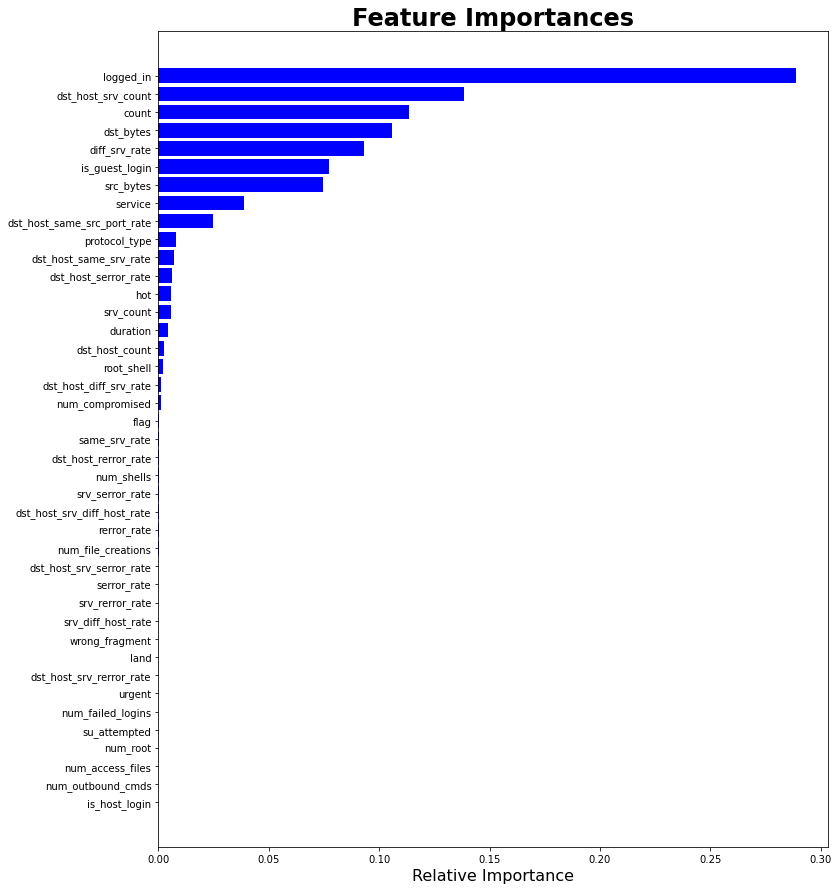

In [63]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']
importances = clf_tree.feature_importances_
indices = np.argsort(importances)
fig = plt.figure(figsize=(12,15))
plt.title('Feature Importances',fontsize=24, fontweight= 'black')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=16)
plt.plot()

### Naive Bayes Model

In [25]:
data4 = pd.read_csv('nbpred1.csv', skiprows=1, header=None)
array3 = data4.values
pre_nb = array3[:,1]

In [26]:
acc_nb=accuracy_score(pre_nb, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_nb*100," %")

------------------------------------------
Accuracy =  87.65712820582023  %


### Random Forest Model

In [27]:
clf_forest = RandomForestClassifier(oob_score=True, max_depth=25)
clf_forest.fit(train_x, train_y)
pre_forest = clf_forest.predict(test_x)
acc_forest=accuracy_score(pre_forest, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_forest*100," %")

------------------------------------------
Accuracy =  99.97031179363998  %


### Logistic Regression Model

In [28]:
clf_log = SGDClassifier(loss='log')
clf_log.fit(train_x, train_y)
pre_log = clf_log.predict(test_x)
acc_log=accuracy_score(pre_log, test_y)
print("------------------------------------------")
print("Accuracy = ",acc_log*100," %")

------------------------------------------
Accuracy =  97.1971634268287  %


### Calculating accuracy, precision, recall and F1-score

In [34]:
def cal_APRF(pre,test):
    result = []
    ACC = round(100*(accuracy_score(pre, test)),3)
    result.append(ACC)
    # 精确率
    P = round(100*(precision_score(pre, test, average="weighted")),3)
    result.append(P)
    # 召回率
    R = round(100*(recall_score(pre, test, average="weighted")),3)
    result.append(R)
    # F1-Score
    F = round(100*(f1_score(pre, test, average="weighted")),3)
    result.append(F)
    return result

score1 = cal_APRF(pre_nb,test_y)
score2 = cal_APRF(pre_log,test_y)
score3 = cal_APRF(pre_tree,test_y)
score4 = cal_APRF(pre_forest,test_y)

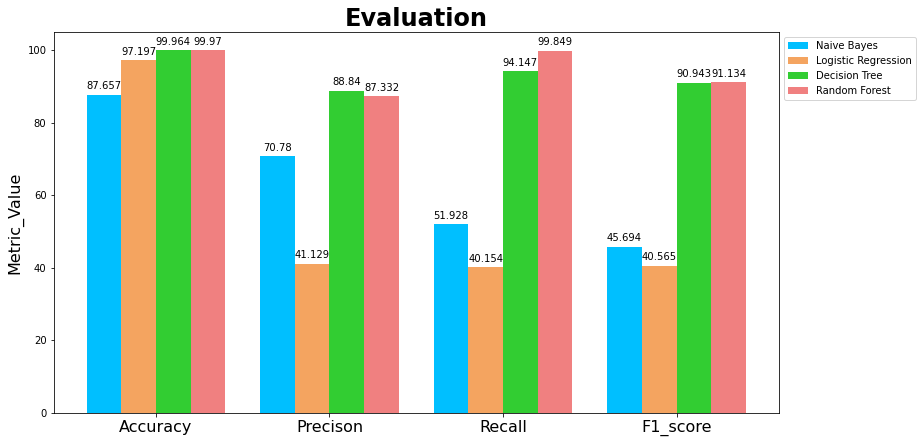

In [35]:
def cal_APRF1(pre,test):
    result = []
    ACC = round(100*(accuracy_score(pre, test)),3)
    result.append(ACC)
    # 精确率
    P = round(100*(precision_score(pre, test, average="macro")),3)
    result.append(P)
    # 召回率
    R = round(100*(recall_score(pre, test, average="macro")),3)
    result.append(R)
    # F1-Score
    F = round(100*(f1_score(pre, test, average="macro")),3)
    result.append(F)
    return result

score31 = cal_APRF1(pre_nb,test_y)
score32 = cal_APRF1(pre_log,test_y)
score33 = cal_APRF1(pre_tree,test_y)
score34 = cal_APRF1(pre_forest,test_y)
draw_APRF(score31,score32,score33,score34)

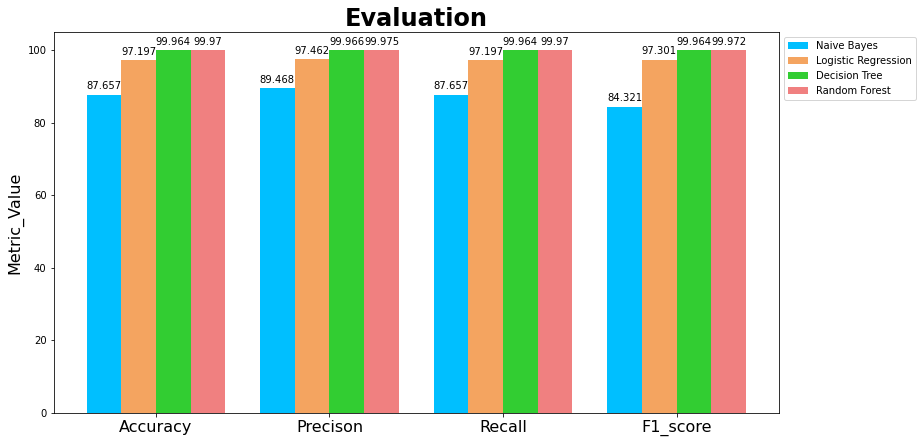

In [31]:
def draw_APRF(score1,score2,score3,score4):
    plt.figure(figsize=(13,7))
    metric = ('Accuracy', 'Precison', 'Recall', 'F1_score', )
    bar_width = 0.2  
    index_nb = np.arange(len(metric))
    index_log = index_nb + bar_width  
    index_tree = index_log + bar_width  
    index_forest = index_tree + bar_width

    p1 = plt.bar(index_nb, height=score1, width=bar_width, color='deepskyblue',label='Naive Bayes')
    p2 = plt.bar(index_log, height=score2, width=bar_width, color='sandybrown',label='Logistic Regression')
    p3 = plt.bar(index_tree, height=score3, width=bar_width, color='limegreen',label='Decision Tree')
    p4 = plt.bar(index_forest, height=score4, width=bar_width, color='lightcoral',label='Random Forest')

    #Mark the value on the graph
    for p in p1:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p2:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p3:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p4:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")

    plt.legend(bbox_to_anchor=(1, 1))  
    plt.xticks(index_log + bar_width/2, metric, fontsize=16)  
    plt.ylabel('Metric_Value', fontsize=16)  
    plt.title('Evaluation', fontsize=24, fontweight= 'black')  
    plt.show()
    
draw_APRF(score1,score2,score3,score4)

### Drawing the confusion matrix

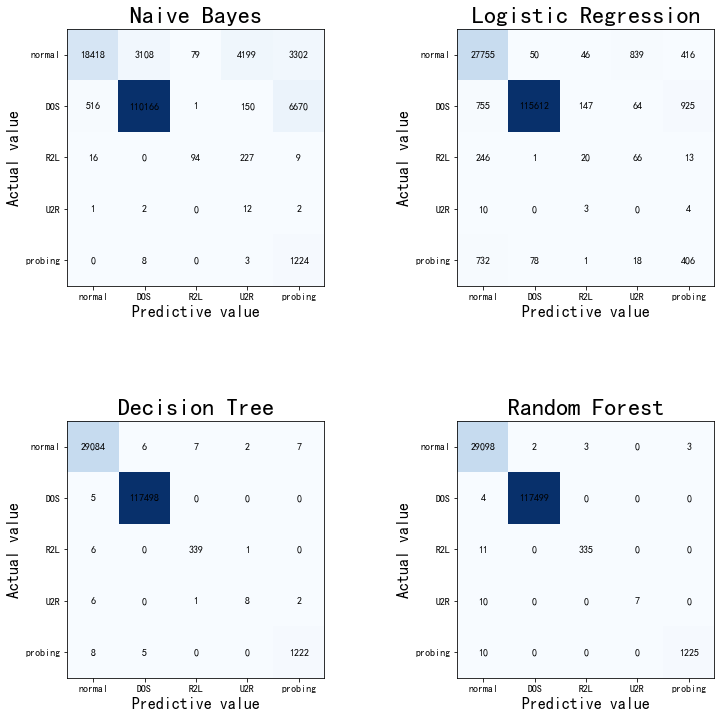

In [180]:
def draw_cm(matrix, matrix2, matrix3, matrix4):
    plt.figure(figsize=(12,12))
    label=np.array(['normal', 'DOS', 'R2L', 'U2R', 'probing'])
    cm=np.array([matrix, matrix2, matrix3, matrix4])
    title=np.array(['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
    
    for k in range(4):
        plt.subplot(2,2,k+1)
        plt.imshow(cm[k], cmap=plt.cm.Blues)
        plt.xticks(range(5), label)
        plt.yticks(range(5), label)
        plt.xlabel('Predictive value',fontsize=16)
        plt.ylabel('Actual value',fontsize=16)
        plt.title(title[k], fontsize=24, fontweight= 'black')

        for i in range(5):    
            for j in range(5):    
                plt.text(j, i, cm[k][i][j],ha="center", va="center")
        
    plt.tight_layout(8)
    plt.show()

matrix1 = confusion_matrix(test_y, pre_nb) 
matrix2 = confusion_matrix(test_y, pre_log)
matrix3 = confusion_matrix(test_y, pre_tree)
matrix4 = confusion_matrix(test_y, pre_forest)
draw_cm(matrix1, matrix2, matrix3, matrix4)

### Drawing the POC curve

In [167]:
#Convert five categories into two categories
def cleanup_2cate(array):
    array_2cate = copy.deepcopy(array)
    array_2cate[np.where(array==2)] = 0
    array_2cate[np.where(array==3)] = 0
    array_2cate[np.where(array==4)] = 0
    array_2cate[np.where(array==5)] = 0
    return array_2cate

test_y_2cate = cleanup_2cate(test_y)
pre_nb_2cate = cleanup_2cate(pre_nb)
pre_log_2cate = cleanup_2cate(pre_log)
pre_tree_2cate = cleanup_2cate(pre_tree)
pre_forest_2cate = cleanup_2cate(pre_forest)

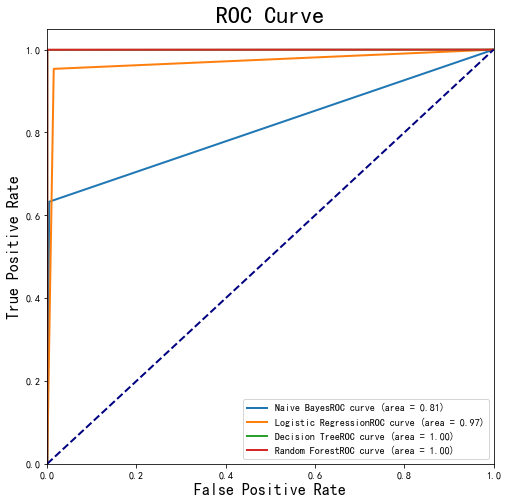

In [182]:
def draw_ROC(test_y_2cate, pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate):
    pre_2cate = np.array([pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate])
    fpr = []
    tpr = []
    roc_auc = []
    
    for k in range(4):
        fpr1, tpr1, threshold1 = roc_curve(test_y_2cate, pre_2cate[k])  ###计算真正率和假正率
        roc_auc1 = auc(fpr1, tpr1)  ###计算auc的值
        fpr.append(fpr1)
        tpr.append(tpr1)
        roc_auc.append(roc_auc1)
        
    title=np.array(['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
    
    plt.figure(figsize=(8, 8))
    
    for k in range(4):
        plt.plot(fpr[k], tpr[k], lw=2, label=title[k]+'ROC curve (area = %0.2f)' % roc_auc[k])  ###假正率为横坐标，真正率为纵坐标做曲线

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=24, fontweight= 'black')
    plt.legend(loc="lower right")
    plt.show()
    
draw_ROC(test_y_2cate,pre_nb_2cate, pre_log_2cate, pre_tree_2cate, pre_forest_2cate)

### Repeating the above operations on the second testing dataset

In [171]:
pre_tree2 = clf_tree.predict(test_x2)
acc_tree2 = accuracy_score(pre_tree2, test_y2)
print("------------------------------------------")
print("Accuracy = ",acc_tree2*100," %")

------------------------------------------
Accuracy =  93.55989753778377  %


In [173]:
data5 = pd.read_csv('nbpred2.csv', skiprows=1, header=None)
array4 = data5.values
pre_nb2 = array4[:,1]
acc_nb2 = accuracy_score(pre_nb2, test_y2)
print("------------------------------------------")
print("Accuracy = ",acc_nb2*100," %")

------------------------------------------
Accuracy =  73.96948061224829  %


In [178]:
pre_forest2 = clf_forest.predict(test_x2)
acc_forest2 = accuracy_score(pre_forest2, test_y2)
print("------------------------------------------")
print("Accuracy = ",acc_forest2*100," %")

------------------------------------------
Accuracy =  93.80176684197762  %


In [175]:
pre_log2 = clf_log.predict(test_x2)
acc_log2 = accuracy_score(pre_log2, test_y2)
print("------------------------------------------")
print("Accuracy = ",acc_log2*100," %")

------------------------------------------
Accuracy =  81.03684852270348  %


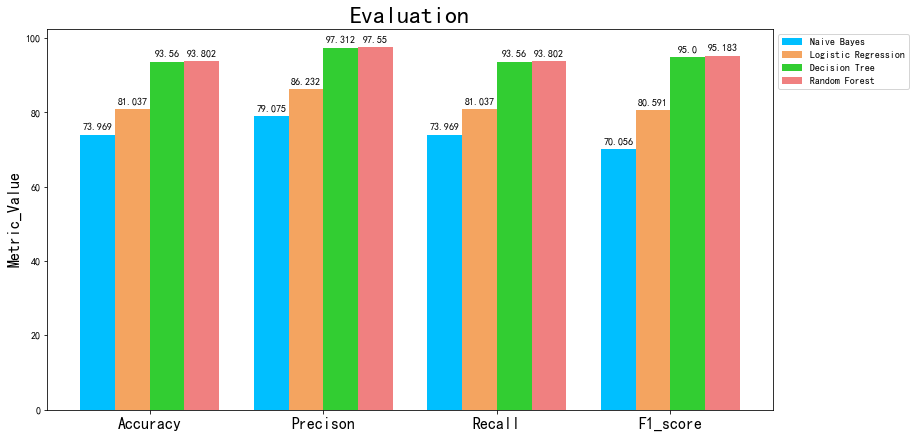

In [179]:
score21 = cal_APRF(pre_nb2,test_y2)
score22 = cal_APRF(pre_log2,test_y2)
score23 = cal_APRF(pre_tree2,test_y2)
score24 = cal_APRF(pre_forest2,test_y2)
draw_APRF(score21,score22,score23,score24)

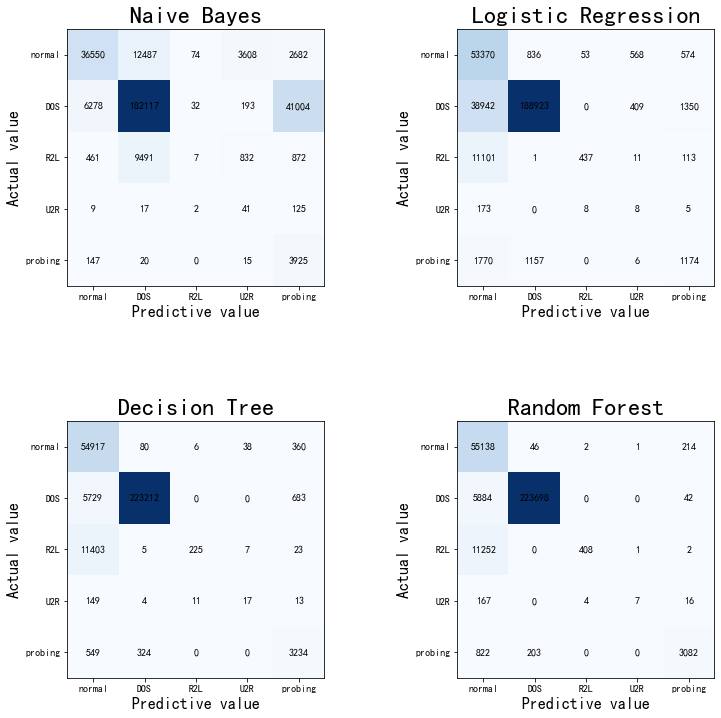

In [181]:
matrix21 = confusion_matrix(test_y2, pre_nb2) 
matrix22 = confusion_matrix(test_y2, pre_log2)
matrix23 = confusion_matrix(test_y2, pre_tree2)
matrix24 = confusion_matrix(test_y2, pre_forest2)
draw_cm(matrix21, matrix22, matrix23, matrix24)

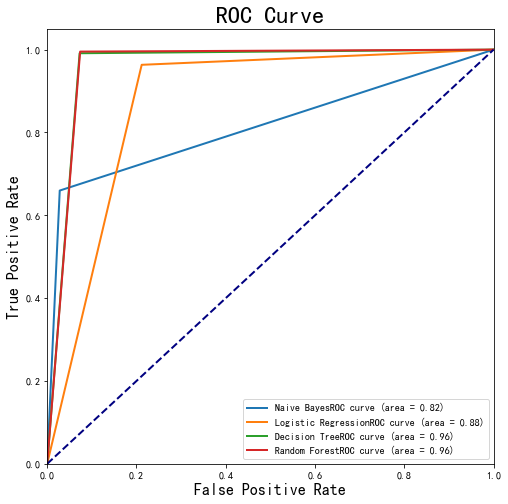

In [183]:
test_y2_2cate = cleanup_2cate(test_y2)
pre_nb2_2cate = cleanup_2cate(pre_nb2)
pre_log2_2cate = cleanup_2cate(pre_log2)
pre_tree2_2cate = cleanup_2cate(pre_tree2)
pre_forest2_2cate = cleanup_2cate(pre_forest2)
draw_ROC(test_y2_2cate, pre_nb2_2cate, pre_log2_2cate, pre_tree2_2cate, pre_forest2_2cate)